In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow.compat.v2 as tf

In [3]:
import numpy as np

In [4]:
#tf.disable_v2_behavior()

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as img

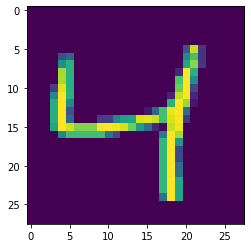

In [8]:
plt.imshow(x_train[2])

In [9]:
# Convert to float32.

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).

x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])

# Normalize images value from [0, 255] to [0, 1].

x_train, x_test = x_train / 255., x_test / 255.

In [10]:
# MNIST dataset parameters.

num_classes = 10 # 0 to 9 digits

num_features = 784 # 28*28

# Training parameters.

learning_rate = 0.01

training_steps = 1000

batch_size = 256

display_step = 50

In [11]:
# Use tf.data API to shuffle and batch data.

train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))

train_data=train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [12]:
# Weight of shape [784, 10], the 28*28 image features, and a total number of classes.

W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")

# Bias of shape [10], the total number of classes.

b = tf.Variable(tf.zeros([num_classes]), name="bias")

W1 = tf.Variable(tf.ones([784, 256]), name="weight1")
b1 = tf.Variable(tf.zeros([256]), name="bias1")


W2 = tf.Variable(tf.ones([256, 10]), name="weight2")
b2 = tf.Variable(tf.zeros([10]), name="bias2")


In [13]:
# Logistic regression (Wx + b).

def logistic_regression(x):
    out1=tf.nn.relu(tf.matmul(x, W1) + b1)
    out2=tf.nn.softmax(tf.matmul(out1, W2) + b2)
    
    
    return out2

# Cross-Entropy loss function.
#def layer(input,weight_shape,bias_shape):
#    weight_stdv=(2.0/weight_shape[0])**0.5
#    w_init=tf.random_normal_initializer(stddev=weight_stdv)
#    bias_init=tf.constant_initializer(value=0)
#    W=tf.compat.v1.get_variable('W',weight_shape,initializer=w_init)
#    b=tf.compat.v1.get_variable('b',bias_shape,initializer=bias_init)
    
#    return tf.nn.relu(tf.matmul(input,W)+b)

#def logistic_regression(x):
#    with tf.compat.v1.variable_scope('hidden_1'):
#        hidden_1=layer(x,[784,256],[256])
#    with tf.compat.v1.variable_scope('hidden_2'):
#        hidden_2=layer(hidden_1,[256,256],[256])
#        
#    with tf.compat.v1.variable_scope('hidden_3'):
#        output=layer(hidden_2,[256,10],[10])
        
#    return output
        
    
    
def cross_entropy(y_pred, y_true):

    # Encode label to a one hot vector.

    y_true = tf.one_hot(y_true, depth=num_classes)

    # Clip prediction values to avoid log(0) error.

    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Compute cross-entropy.

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

In [14]:
# Accuracy metric.

def accuracy(y_pred, y_true):
    

    # Predicted class is the index of the highest score in prediction vector (i.e. argmax).

    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # Stochastic gradient descent optimizer.

optimizer = tf.optimizers.SGD(learning_rate)

In [18]:
# Optimization process. 

def run_optimization(x, y):

# Wrap computation inside a GradientTape for automatic differentiation.

    with tf.GradientTape() as g:

        pred = logistic_regression(x)

        loss = cross_entropy(pred, y)

    # Compute gradients.

    gradients1 = g.gradient(loss, [W1, b1])
 #   gradients2 = g.gradient(loss, [W2, b2])

  

    # Update W and b following gradients.

    optimizer.apply_gradients(zip(gradients1, [W1, b1]))
  #  optimizer.apply_gradients(zip(gradients2, [W2, b2]))

In [19]:
# Run training for the given number of steps.

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):

    # Run the optimization to update W and b values.

    run_optimization(batch_x, batch_y)

    

    if step % display_step == 0:

        pred = logistic_regression(batch_x)

        loss = cross_entropy(pred, batch_y)

        acc = accuracy(pred, batch_y)

        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 589.461853, accuracy: 0.097656
step: 100, loss: 589.461853, accuracy: 0.085938
step: 150, loss: 589.461914, accuracy: 0.097656
step: 200, loss: 589.461853, accuracy: 0.089844
step: 250, loss: 589.461853, accuracy: 0.097656
step: 300, loss: 589.461853, accuracy: 0.117188
step: 350, loss: 589.461853, accuracy: 0.128906
step: 400, loss: 589.461853, accuracy: 0.085938
step: 450, loss: 589.461853, accuracy: 0.089844
step: 500, loss: 589.461914, accuracy: 0.097656
step: 550, loss: 589.461853, accuracy: 0.097656
step: 600, loss: 589.461914, accuracy: 0.082031
step: 650, loss: 589.461914, accuracy: 0.089844
step: 700, loss: 589.461914, accuracy: 0.109375
step: 750, loss: 589.461914, accuracy: 0.070312
step: 800, loss: 589.461853, accuracy: 0.062500
step: 850, loss: 589.461853, accuracy: 0.105469
step: 900, loss: 589.461853, accuracy: 0.093750
step: 950, loss: 589.461914, accuracy: 0.105469
step: 1000, loss: 589.461853, accuracy: 0.101562


In [17]:
# Test model on validation set.

pred = logistic_regression(x_test)

print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.098000
